# Introduction to the Uber Dataset

In [2]:
import pandas as pd                              # thư viện xử lý dữ liệu

# Read in the dataset of July Uber pickups
uber_data = pd.read_csv("uber-raw-data-jul14.csv")  # đọc file CSV

print(uber_data.tail(10))                         # in 10 dòng cuối
uber_data.info()                                  # thông tin dataset


                 Date/Time      Lat      Lon    Base
796111  7/31/2014 22:53:00  40.6262 -73.9448  B02764
796112  7/31/2014 22:54:00  40.7617 -73.9650  B02764
796113  7/31/2014 22:56:00  40.7049 -73.9337  B02764
796114  7/31/2014 23:05:00  40.7483 -74.0040  B02764
796115  7/31/2014 23:06:00  40.7332 -73.9934  B02764
796116  7/31/2014 23:22:00  40.7285 -73.9846  B02764
796117  7/31/2014 23:23:00  40.7615 -73.9868  B02764
796118  7/31/2014 23:29:00  40.6770 -73.9515  B02764
796119  7/31/2014 23:30:00  40.7225 -74.0038  B02764
796120  7/31/2014 23:58:00  40.7199 -73.9884  B02764
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


In [3]:
#Convert the type of the column to datetime
uber_data["Date/Time"] = pd.to_datetime(uber_data["Date/Time"]) # chuyển đổi kiểu dữ liệu cột Date/Time sang datetime

In [4]:
#Using a floor can round off the date-time into discrete increments
print(uber_data["Date/Time"].dt.floor('1h').tail(10))   # làm tròn thời gian đến giờ gần nhất và in 10 dòng cuối

796111   2014-07-31 22:00:00
796112   2014-07-31 22:00:00
796113   2014-07-31 22:00:00
796114   2014-07-31 23:00:00
796115   2014-07-31 23:00:00
796116   2014-07-31 23:00:00
796117   2014-07-31 23:00:00
796118   2014-07-31 23:00:00
796119   2014-07-31 23:00:00
796120   2014-07-31 23:00:00
Name: Date/Time, dtype: datetime64[ns]


In [5]:
#Let's get value counts to see the number of trips at given times
print(uber_data["Date/Time"].dt.floor('1h').value_counts().head(10))    # đếm số chuyến đi theo giờ và in 10 giá trị đầu

Date/Time
2014-07-15 18:00:00    3302
2014-07-15 19:00:00    3225
2014-07-15 17:00:00    3045
2014-07-02 18:00:00    2946
2014-07-15 20:00:00    2840
2014-07-23 20:00:00    2791
2014-07-23 21:00:00    2559
2014-07-31 18:00:00    2531
2014-07-23 17:00:00    2519
2014-07-02 17:00:00    2479
Name: count, dtype: int64


In [6]:
#And sort the data so it is chronological
hourly_data = uber_data["Date/Time"].dt.floor('1h').value_counts()  # đếm số chuyến đi theo giờ
hourly_data = hourly_data.sort_index()  # sắp xếp theo thời gian
print(hourly_data.head(10))  # in 10 giá trị đầu sau khi sắp xếp theo thời gian

Date/Time
2014-07-01 00:00:00     216
2014-07-01 01:00:00     111
2014-07-01 02:00:00      82
2014-07-01 03:00:00     134
2014-07-01 04:00:00     223
2014-07-01 05:00:00     348
2014-07-01 06:00:00     715
2014-07-01 07:00:00    1196
2014-07-01 08:00:00    1076
2014-07-01 09:00:00     885
Name: count, dtype: int64


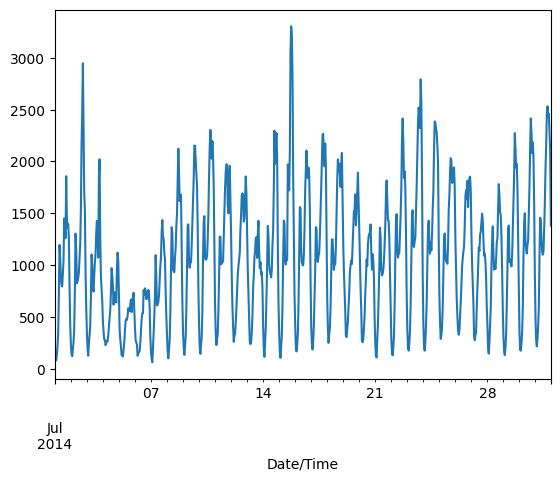

In [7]:
import matplotlib.pyplot as plt                     # thư viện vẽ biểu đồ
#Plotting the data shows some trend components
hourly_data.plot(kind="line")   # vẽ biểu đồ đường
plt.show()                      # hiển thị biểu đồ

In [8]:
#We are going to see the average number of trips for each hour/week day combination
#First split the date into the week day, hour and the actual date
hours = uber_data["Date/Time"].dt.hour               # lấy giờ từ cột Date/Time
week_day = uber_data["Date/Time"].dt.weekday    # lấy ngày trong tuần từ cột Date/Time
date = uber_data["Date/Time"].dt.date
weekly_data = pd.concat([week_day, hours, date], axis=1)    # kết hợp các cột thành DataFrame mới
weekly_data.columns = ["Week Day", "Hour", "Date"]  # đặt tên cho các cột
print(week_day.iloc[66003])                     # in giá trị ngày trong tuần của dòng 66003
print(weekly_data.tail(10)) 

5
        Week Day  Hour        Date
796111         3    22  2014-07-31
796112         3    22  2014-07-31
796113         3    22  2014-07-31
796114         3    23  2014-07-31
796115         3    23  2014-07-31
796116         3    23  2014-07-31
796117         3    23  2014-07-31
796118         3    23  2014-07-31
796119         3    23  2014-07-31
796120         3    23  2014-07-31


In [9]:
import calendar
#The calendar library can map the integer versions of calendar weekdays to the actual name
#0 -> Monday, 1 -> Tuesday, etc.
print(calendar.day_name[6])     # in tên ngày tương ứng với số 6 (Chủ nhật)

Sunday


In [10]:
#Map the name
weekly_data["Week Day"] = weekly_data["Week Day"].apply(lambda x: calendar.day_name[x]) # chuyển số ngày trong tuần thành tên ngày
print(weekly_data["Week Day"].iloc[66003])   # in tên ngày tương ứng với dòng 66003

Saturday


In [11]:
#By grouping by the date, week day, and hour we can aggregate the size (# of entries) on each date
weekly_data = weekly_data.groupby(["Date","Week Day", "Hour"]).size()   # nhóm theo ngày, ngày trong tuần và giờ, đếm số chuyến đi
print(weekly_data.head(10))  # in 10 giá trị đầu của dữ liệu đã nhóm

Date        Week Day  Hour
2014-07-01  Tuesday   0        216
                      1        111
                      2         82
                      3        134
                      4        223
                      5        348
                      6        715
                      7       1196
                      8       1076
                      9        885
dtype: int64


In [12]:
#Reset the index    
weekly_data = weekly_data.reset_index()                     # đặt lại chỉ mục
print(weekly_data.head(10)) # in 10 giá trị đầu sau khi đặt lại chỉ mục

         Date Week Day  Hour     0
0  2014-07-01  Tuesday     0   216
1  2014-07-01  Tuesday     1   111
2  2014-07-01  Tuesday     2    82
3  2014-07-01  Tuesday     3   134
4  2014-07-01  Tuesday     4   223
5  2014-07-01  Tuesday     5   348
6  2014-07-01  Tuesday     6   715
7  2014-07-01  Tuesday     7  1196
8  2014-07-01  Tuesday     8  1076
9  2014-07-01  Tuesday     9   885


In [13]:
#Rename 0, the default column name to be size
weekly_data = weekly_data.rename(columns={0: "Size"})   # đổi tên cột 0 thành Size
print(weekly_data.head(10)) # in 10 giá trị đầu sau khi đổi tên cột

         Date Week Day  Hour  Size
0  2014-07-01  Tuesday     0   216
1  2014-07-01  Tuesday     1   111
2  2014-07-01  Tuesday     2    82
3  2014-07-01  Tuesday     3   134
4  2014-07-01  Tuesday     4   223
5  2014-07-01  Tuesday     5   348
6  2014-07-01  Tuesday     6   715
7  2014-07-01  Tuesday     7  1196
8  2014-07-01  Tuesday     8  1076
9  2014-07-01  Tuesday     9   885


In [14]:
#Now we can group by the week day and average to get the mean for each week day/hour
weekly_data = weekly_data.groupby(["Week Day", "Hour"])["Size"].mean()  # nhóm theo ngày trong tuần và giờ, tính trung bình số chuyến đi
print(weekly_data.head(10))     # in 10 giá trị đầu sau khi tính trung bình                  

Week Day  Hour
Friday    0        615.00
          1        385.25
          2        264.75
          3        307.50
          4        339.75
          5        497.25
          6        736.75
          7       1008.00
          8       1038.00
          9        907.75
Name: Size, dtype: float64


In [15]:
#Unstack takes a level of the index and translates it to be a column
#We pick level=0 because we want the week day name to be the column
weekly_data = weekly_data.unstack(level=0)   # chuyển đổi chỉ mục thành cột
print(weekly_data)                    # in dữ liệu sau khi chuyển đổi

Week Day   Friday   Monday  Saturday   Sunday  Thursday  Tuesday  Wednesday
Hour                                                                       
0          615.00   315.00   1110.25  1090.00     430.0    301.8      354.6
1          385.25   153.25    788.25   829.50     231.4    155.8      193.2
2          264.75   109.75    580.00   638.25     171.0    111.2      156.0
3          307.50   254.75    426.00   477.00     256.6    187.0      224.0
4          339.75   403.75    271.75   245.50     376.8    296.6      326.0
5          497.25   615.25    274.25   231.25     586.2    546.0      559.8
6          736.75   911.00    303.50   256.75     959.2    962.2     1003.4
7         1008.00  1266.50    398.50   316.25    1341.8   1350.0     1425.8
8         1038.00  1199.25    525.25   466.75    1336.6   1332.4     1425.0
9          907.75   923.00    667.00   657.50    1077.0   1012.2     1083.8
10         875.75   855.75    823.25   801.25    1014.2    977.4     1035.2
11         9

In [16]:
#Reindex allows you to re-arrange the columns however you would like    
weekly_data = weekly_data.reindex(columns=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])   # sắp xếp lại cột theo thứ tự từ thứ hai đến chủ nhật
print(weekly_data)                   # in dữ liệu sau khi sắp xếp lại cột

Week Day   Monday  Tuesday  Wednesday  Thursday   Friday  Saturday   Sunday
Hour                                                                       
0          315.00    301.8      354.6     430.0   615.00   1110.25  1090.00
1          153.25    155.8      193.2     231.4   385.25    788.25   829.50
2          109.75    111.2      156.0     171.0   264.75    580.00   638.25
3          254.75    187.0      224.0     256.6   307.50    426.00   477.00
4          403.75    296.6      326.0     376.8   339.75    271.75   245.50
5          615.25    546.0      559.8     586.2   497.25    274.25   231.25
6          911.00    962.2     1003.4     959.2   736.75    303.50   256.75
7         1266.50   1350.0     1425.8    1341.8  1008.00    398.50   316.25
8         1199.25   1332.4     1425.0    1336.6  1038.00    525.25   466.75
9          923.00   1012.2     1083.8    1077.0   907.75    667.00   657.50
10         855.75    977.4     1035.2    1014.2   875.75    823.25   801.25
11         8

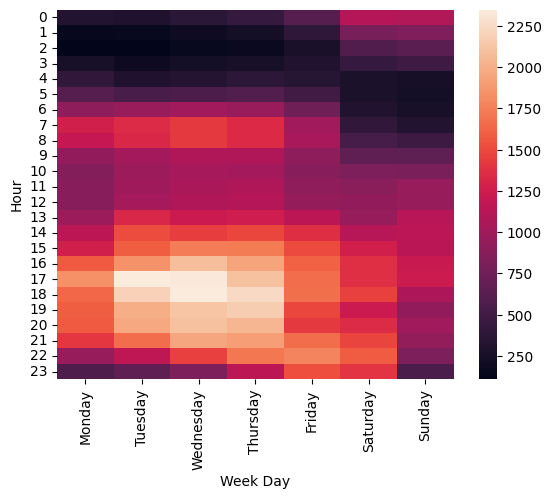

In [17]:
import seaborn as sns                  # thư viện vẽ biểu đồ nâng cao
#Plot a heatmap of the data
sns.heatmap(weekly_data)    # vẽ biểu đồ nhiệt
plt.show()                     # hiển thị biểu đồ

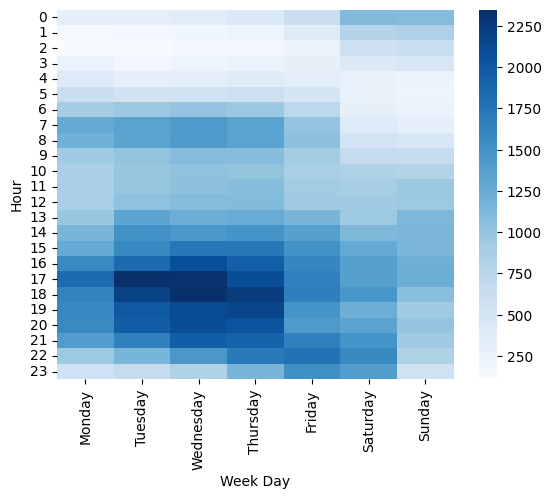

In [18]:
#Change the color map to blue   
sns.heatmap(weekly_data, cmap='Blues')  # vẽ biểu đồ nhiệt với bảng màu xanh dương
plt.show()                   # hiển thị biểu đồ

# Points of Interest

In [19]:
#geopy is a library which finds distance between latitude and longitude! python3 -m 
%pip install geopy            # cài đặt thư viện geopy
import geopy.distance      # thư viện tính khoảng cách địa lý

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'f:\Công cụ\Python3.9\python.exe -m pip install --upgrade pip' command.


In [20]:
#Check to make sure latitude and longitude are in the right order
metro_art_coordinates = (40.7794, -73.9632) # tọa độ của Bảo tàng Nghệ thuật Metropolitan
empire_state_building_coordinates = (40.7484, -73.9857) # tọa độ của Tòa nhà Empire State
distance = geopy.distance.distance(metro_art_coordinates, empire_state_building_coordinates)    # tính khoảng cách giữa hai tọa độ
print(distance)                 # in khoảng cách
print(distance.mi)          # in khoảng cách tính bằng dặm

3.9319431838516716 km
2.443196223959372


In [21]:
#Easy way to convert our latitude and longitude columns to tuples
print(uber_data[["Lat", "Lon"]].apply(lambda x: tuple(x),axis=1))   # in tọa độ (vĩ độ, kinh độ) của từng chuyến đi

0         (40.7586, -73.9706)
1         (40.7605, -73.9994)
2          (40.732, -73.9999)
3         (40.7635, -73.9793)
4         (40.7204, -74.0047)
                 ...         
796116    (40.7285, -73.9846)
796117    (40.7615, -73.9868)
796118     (40.677, -73.9515)
796119    (40.7225, -74.0038)
796120    (40.7199, -73.9884)
Length: 796121, dtype: object


In [22]:
#Using the geopy version may take too long, so we will use the haversine formula instead
from math import radians, cos, sin, asin, sqrt  # thư viện toán học

def haversine(coordinates1, coordinates2):  

    lon1 = coordinates1[1]      # kinh độ điểm 1
    lat1 = coordinates1[0]    #Kinh độ điểm 1
    lon2 = coordinates2[1]  # kinh độ điểm 2
    lat2 = coordinates2[0]  # vĩ độ điểm 2
    #Change to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2]) # chuyển đổi sang radian
    
    
    # Apply the harversine formula
    dlon = lon2 - lon1  # chênh lệch kinh độ
    dlat = lat2 - lat1  # chênh lệch vĩ độ
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 # công thức haversine
    c = 2 * asin(sqrt(a))   # góc trung tâm
    r = 3956    # bán kính Trái Đất bằng dặm
    return c * r    # trả về khoảng cách
print(haversine(metro_art_coordinates, empire_state_building_coordinates))  # in khoảng cách tính bằng dặm
print(distance.mi)        # in khoảng cách tính bằng dặm

2.442501323483997
2.443196223959372


In [23]:
#Now, we can find the distances to both attractions
uber_data["Distance MM"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(metro_art_coordinates,tuple(x)),axis=1)  # tính khoảng cách từ điểm đón đến Bảo tàng Nghệ thuật Metropolitan
uber_data["Distance ESB"] = uber_data[["Lat", "Lon"]].apply(lambda x: haversine(empire_state_building_coordinates,tuple(x)),axis=1) # tính khoảng cách từ điểm đón đến Tòa nhà Empire State
print(uber_data["Distance MM"].head(5)) # in 5 giá trị đầu của khoảng cách đến Bảo tàng Nghệ thuật Metropolitan
print(uber_data["Distance ESB"].head(5))    # in 5 giá trị đầu của khoảng cách đến Tòa nhà Empire State

0    1.487358
1    2.299140
2    3.794105
3    1.383450
4    4.615925
Name: Distance MM, dtype: float64
0    1.058178
1    1.100642
2    1.354266
3    1.094999
4    2.173858
Name: Distance ESB, dtype: float64


In [24]:
#Summarize the data 
print(uber_data[["Distance MM", "Distance ESB"]].describe())    # in thống kê mô tả của khoảng cách đến Bảo tàng Nghệ thuật Metropolitan và Tòa nhà Empire State

         Distance MM   Distance ESB
count  796121.000000  796121.000000
mean        3.868244       2.723783
std         3.200848       3.276343
min         0.037592       0.000000
25%         1.863763       0.976621
50%         3.329218       1.726115
75%         4.691434       3.037256
max        86.770131      88.188585


In [25]:
#Using boolean indexing, we can sum to find the count within a specified range
print((uber_data[["Distance MM", "Distance ESB"]] < .25).sum())  # đếm số chuyến đi có khoảng cách đến Bảo tàng Nghệ thuật Metropolitan và Tòa nhà Empire State nhỏ hơn 0.25 dặm

Distance MM      2764
Distance ESB    15133
dtype: int64


In [26]:
import numpy as np
#Distance range takes a start, end (non-inclusive) and step amount
distance_range = np.arange(.1,5.1,.1)   # tạo mảng khoảng cách từ 0.1 đến 5.0 với bước nhảy 0.1
print(distance_range)               # in mảng khoảng cách

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5. ]


In [27]:
#Run our analysis for each distance
distance_data = [(uber_data[["Distance MM", "Distance ESB"]] < dist).sum() for dist in distance_range]  # đếm số chuyến đi có khoảng cách đến Bảo tàng Nghệ thuật Metropolitan và Tòa nhà Empire State nhỏ hơn từng giá trị trong mảng khoảng cách
print(distance_data)               # in kết quả đếm số chuyến đi

[Distance MM      575
Distance ESB    2387
dtype: int64, Distance MM     1776
Distance ESB    9661
dtype: int64, Distance MM      4566
Distance ESB    22166
dtype: int64, Distance MM      8783
Distance ESB    42427
dtype: int64, Distance MM     13606
Distance ESB    68011
dtype: int64, Distance MM     20770
Distance ESB    92650
dtype: int64, Distance MM      29408
Distance ESB    119621
dtype: int64, Distance MM      38912
Distance ESB    147815
dtype: int64, Distance MM      50497
Distance ESB    177759
dtype: int64, Distance MM      63072
Distance ESB    206056
dtype: int64, Distance MM      75474
Distance ESB    240003
dtype: int64, Distance MM      89442
Distance ESB    277785
dtype: int64, Distance MM     105692
Distance ESB    311312
dtype: int64, Distance MM     123431
Distance ESB    335385
dtype: int64, Distance MM     141656
Distance ESB    355731
dtype: int64, Distance MM     157194
Distance ESB    375017
dtype: int64, Distance MM     174148
Distance ESB    393510
dtype: in

In [28]:
#Concat
distance_data = pd.concat(distance_data, axis=1)    # kết hợp kết quả đếm số chuyến đi thành DataFrame
print(distance_data)          # in dữ liệu sau khi kết hợp

                0     1      2      3      4      5       6       7       8   \
Distance MM    575  1776   4566   8783  13606  20770   29408   38912   50497   
Distance ESB  2387  9661  22166  42427  68011  92650  119621  147815  177759   

                  9   ...      40      41      42      43      44      45  \
Distance MM    63072  ...  512662  529702  546998  563198  575552  588588   
Distance ESB  206056  ...  656735  661066  665748  670373  674744  678522   

                  46      47      48      49  
Distance MM   597941  614256  621624  626604  
Distance ESB  682262  685487  688588  691884  

[2 rows x 50 columns]


In [29]:
#Transpose and add in the index
distance_data = distance_data.transpose()   # chuyển vị dữ liệu
distance_data.index = distance_range    # đặt chỉ mục là mảng khoảng cách
print(distance_data)               # in dữ liệu sau khi chuyển vị và đặt chỉ mục

     Distance MM  Distance ESB
0.1          575          2387
0.2         1776          9661
0.3         4566         22166
0.4         8783         42427
0.5        13606         68011
0.6        20770         92650
0.7        29408        119621
0.8        38912        147815
0.9        50497        177759
1.0        63072        206056
1.1        75474        240003
1.2        89442        277785
1.3       105692        311312
1.4       123431        335385
1.5       141656        355731
1.6       157194        375017
1.7       174148        393510
1.8       190108        412560
1.9       204501        434040
2.0       219190        453986
2.1       234681        472681
2.2       250469        489396
2.3       265164        502460
2.4       276425        518076
2.5       291165        532569
2.6       306739        544541
2.7       318762        557718
2.8       329219        571684
2.9       341297        583354
3.0       354514        592929
3.1       369129        603990
3.2     

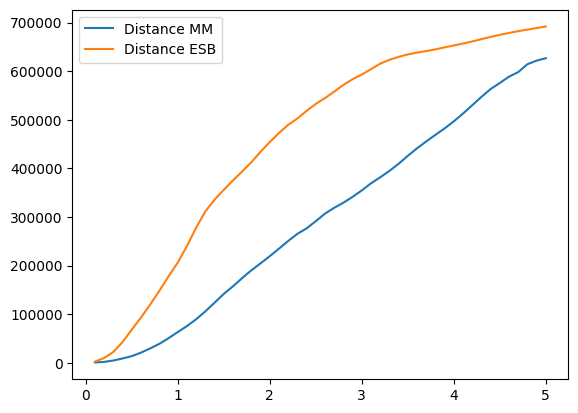

In [30]:
#And plot
distance_data.plot(kind="line")  # vẽ biểu đồ đường
plt.show()                   # hiển thị biểu đồ

# Mapping Data with Folium

In [12]:
%pip install folium                                  # cài thư viện folium
# Folium can let us map geographical data, first get a base map with latitude and longitude
import folium as folium                              # import folium
uber_map = folium.Map(
    location=[10.827689834253347, 106.69957982079725],  # tọa độ ĐH Văn Lang CS3
    zoom_start=18                                   # mức zoom
)
uber_map                                             # hiển thị bản đồ


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'
You should consider upgrading via the 'f:\Công cụ\Python3.9\python.exe -m pip install --upgrade pip' command.


In [32]:
from folium.plugins import HeatMap                    # import plugin HeatMap

lat_lon = uber_data[["Lat", "Lon"]].values[:10000]    # lấy 10.000 cặp tọa độ (lat, lon)
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)  # tạo bản đồ, tâm New York
#A heatmap can be plotted like so... the radius argument controls the radius of each point within the map
#You can zoom in on this map to see more specific areas, or out to see more general
HeatMap(lat_lon, radius=13).add_to(uber_map)         # thêm heatmap, bán kính điểm = 13
uber_map                                             # hiển thị bản đồ


In [33]:
lat_lon = uber_data[["Lat", "Lon"]].values[:10000]   # lấy 10.000 cặp tọa độ (lat, lon)
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=10)  # tạo bản đồ, tâm New York
#A bigger radius (and more zoom) can let us observe drop offs outside of the city that happen often
#Such as the airport
HeatMap(lat_lon, radius=30).add_to(uber_map)        # thêm heatmap, bán kính điểm = 30
uber_map                                            # hiển thị bản đồ


In [34]:
#We can also give a weight to either give different values to points, or to make the graphs less dense looking
uber_data["Weight"] = .5
lat_lon = uber_data[["Lat", "Lon", "Weight"]].values[:10000]
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#Now let's increase radius since the weights are less
HeatMap(lat_lon, radius=15).add_to(uber_map)
uber_map

In [52]:
# Let's get the points that are within distance of either point of interest
# There won't be overlap if we use only points that are .25 mile away
i = uber_data[["Distance MM", "Distance ESB"]] < .25   # kiểm tra khoảng cách < 0.25 mile
print(i)                                              # in kết quả True/False


        Distance MM  Distance ESB
0             False         False
1             False         False
2             False         False
3             False         False
4             False         False
...             ...           ...
796116        False         False
796117        False         False
796118        False         False
796119        False         False
796120        False         False

[796121 rows x 2 columns]


In [53]:
#Take data where either one is true
i = i.any(axis=1) 
print(i) 

0         False
1         False
2         False
3         False
4         False
          ...  
796116    False
796117    False
796118    False
796119    False
796120    False
Length: 796121, dtype: bool


In [54]:
#This is our map data
map_data = uber_data[i].copy()
print(map_data)

                 Date/Time      Lat      Lon    Base  Distance MM  \
5      2014-07-01 00:35:00  40.7487 -73.9869  B02512     2.455439   
13     2014-07-01 02:07:00  40.7471 -73.9872  B02512     2.559080   
17     2014-07-01 03:20:00  40.7498 -73.9813  B02512     2.252287   
31     2014-07-01 05:22:00  40.7489 -73.9874  B02512     2.456893   
104    2014-07-01 07:39:00  40.7782 -73.9590  B02512     0.234702   
...                    ...      ...      ...     ...          ...   
795863 2014-07-31 13:02:00  40.7463 -73.9888  B02764     2.648655   
795910 2014-07-31 15:35:00  40.7460 -73.9864  B02764     2.605797   
795925 2014-07-31 16:05:00  40.7449 -73.9866  B02764     2.678014   
795940 2014-07-31 16:32:00  40.7501 -73.9825  B02764     2.260816   
796101 2014-07-31 22:29:00  40.7495 -73.9820  B02764     2.286599   

        Distance ESB  Weight           Date_Hour  
5           0.066098     0.5 2014-07-01 00:00:00  
13          0.119218     0.5 2014-07-01 02:00:00  
17          0.2496

In [56]:
# Let's draw on a heatmap with the locations within the radius
# Notice that one heatmap is a semi-circle because drop offs can't happen to the left of it
map_data["Weight"] = .1                               # thêm trọng số cho mỗi điểm
lat_lon = map_data[["Lat", "Lon", "Weight"]].values   # lấy lat, lon và weight
uber_map = folium.Map(location=[40.7728, -74.0060], zoom_start=13)  # tạo bản đồ
HeatMap(lat_lon, radius=10).add_to(uber_map)          # thêm heatmap vào bản đồ
uber_map                                              # hiển thị bản đồ


In [57]:
# Let's grab only the date and hour by replacing the other parts with 0
uber_data["Date_Hour"] = uber_data["Date/Time"].apply(
    lambda x: x.replace(microsecond=0, second=0, minute=0)  # giữ lại ngày + giờ
)
print(uber_data["Date_Hour"])                              # in cột Date_Hour


0        2014-07-01 00:00:00
1        2014-07-01 00:00:00
2        2014-07-01 00:00:00
3        2014-07-01 00:00:00
4        2014-07-01 00:00:00
                 ...        
796116   2014-07-31 23:00:00
796117   2014-07-31 23:00:00
796118   2014-07-31 23:00:00
796119   2014-07-31 23:00:00
796120   2014-07-31 23:00:00
Name: Date_Hour, Length: 796121, dtype: datetime64[ns]


In [40]:
from datetime import datetime
#Take only the first week of data
map_data = uber_data[uber_data["Date/Time"] < datetime(2014,7,8)].copy()
map_data["Weight"] = .5
#Randomly sample 1/3 the values in each group
map_data = map_data.groupby('Date_Hour').apply(lambda x: x[["Lat", "Lon", "Weight"]].sample(int(len(x)/3)).values.tolist())
#Get the index
date_hour_index = [x.strftime("%m/%d/%Y, %H:%M:%S") for x in map_data.index]
#Get the data in list form (each element of this bigger list will be a list of lists with lat/lon/weight)
#Each element of the bigger list is a for a date/hour combo
date_hour_data = map_data.tolist()

C:\Users\duong\AppData\Local\Temp\ipykernel_20580\2835678608.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  map_data = map_data.groupby('Date_Hour').apply(lambda x: x[["Lat", "Lon", "Weight"]].sample(int(len(x)/3)).values.tolist())


In [41]:
from folium.plugins import HeatMapWithTime
uber_map = folium.Map(location=[40.7128, -74.0060], zoom_start=12)
#A heatmap with time can now be out together
hm = HeatMapWithTime(date_hour_data, index=date_hour_index)
hm.add_to(uber_map)
uber_map

# Testing Seasonality

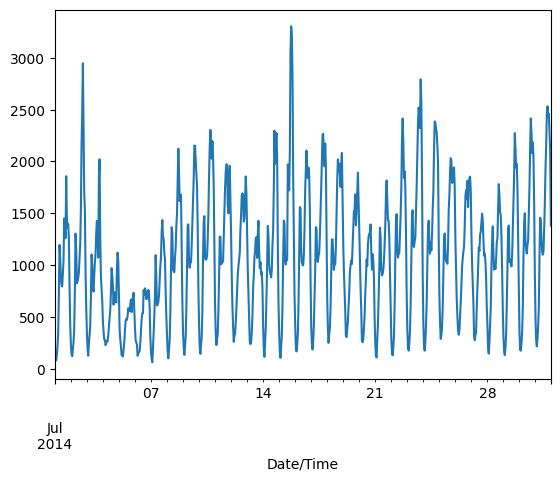

In [42]:
#Recall the seasonality we saw before
hourly_data.plot(kind='line')
plt.show()

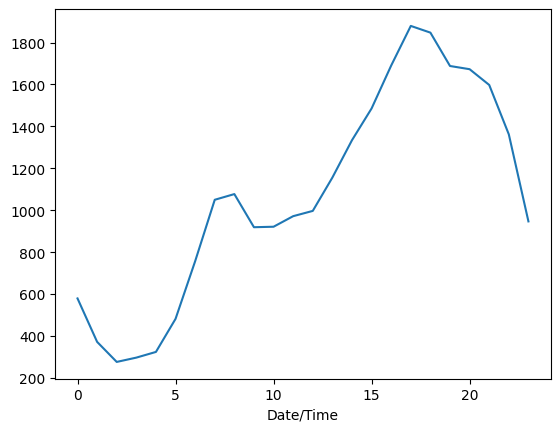

In [43]:
#What about the hourly trends?
h = hourly_data.groupby(hourly_data.index.hour).mean()
h.plot(kind="line")
plt.show()

In [44]:
#Something else of interest is the difference in hourly trends for weekdays and weekends
#We will index with i for weekdays
i = hourly_data.index.weekday <= 4

h_week = hourly_data.loc[i].groupby(hourly_data.loc[i].index.hour).mean()
h_weekend = hourly_data.loc[~i].groupby(hourly_data.loc[~i].index.hour).mean()
h = pd.concat([h_week, h_weekend], axis=1)
h.columns = ["Weekday", "Weekend"]
print(h)

               Weekday   Weekend
Date/Time                       
0           397.913043  1100.125
1           219.826087   808.875
2           160.391304   609.125
3           242.913043   451.500
4           346.565217   258.625
5           561.304348   252.750
6           922.391304   280.125
7          1290.695652   357.375
8          1279.086957   496.000
9          1008.173913   662.250
10          959.130435   812.250
11          988.695652   922.500
12         1017.086957   938.375
13         1195.869565  1040.875
14         1403.652174  1134.125
15         1583.130435  1205.125
16         1828.434783  1293.625
17         2080.478261  1301.125
18         2050.739130  1262.625
19         1900.826087  1076.625
20         1845.695652  1176.000
21         1734.217391  1205.125
22         1416.956522  1203.500
23          936.869565   974.750


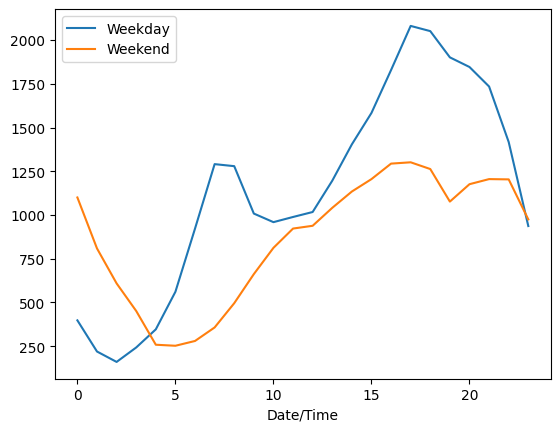

In [45]:
#And plot to see the difference
h.plot(kind='line')
plt.show()

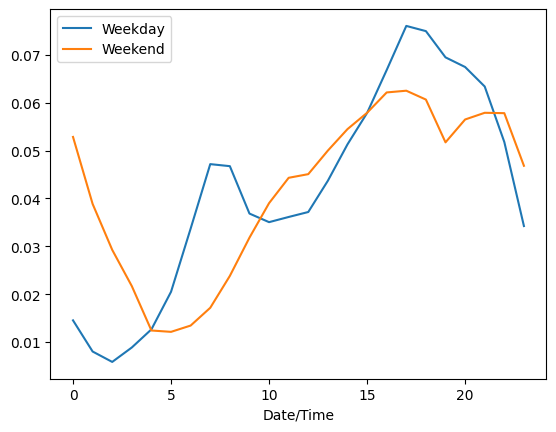

In [46]:
#We can also divide by the total number of trips for each to normalize and have each be a percent of total trips in a day
(h / h.sum()).plot(kind='line')
plt.show()

In [47]:
#We can finish our assessment of whether or not we see hourly effects by using a t-test to see if each hour
#has a statistically different proportion of rides for weekends vs. weekdays
from scipy.stats import ttest_ind

#The functions takes two samples and returns the t-stat and the p-value denoting the null hypothesis that they are the same
print(ttest_ind([100,105,110], [200,230,210]))

TtestResult(statistic=np.float64(-11.67434463174037), pvalue=np.float64(0.0003078015152715608), df=np.float64(4.0))


In [48]:
#Now for each day, let's normalize by the total number of rides in the day
hourly_data_pct = hourly_data.groupby(hourly_data.index.date).apply(lambda x: x / x.sum())    
print(hourly_data_pct)    

            Date/Time          
2014-07-01  2014-07-01 00:00:00    0.010175
            2014-07-01 01:00:00    0.005229
            2014-07-01 02:00:00    0.003863
            2014-07-01 03:00:00    0.006312
            2014-07-01 04:00:00    0.010505
                                     ...   
2014-07-31  2014-07-31 19:00:00    0.072449
            2014-07-31 20:00:00    0.073343
            2014-07-31 21:00:00    0.067827
            2014-07-31 22:00:00    0.062580
            2014-07-31 23:00:00    0.041203
Name: count, Length: 744, dtype: float64
